## I was assigned this project in which I analyzed 911 call data from [Jose Portilla's Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/)

## Data Source: [Kaggle](https://www.kaggle.com/mchirico/montcoalert)

In [1]:
#import numpy and pandas
import numpy as np
import pandas as pd

In [45]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load data file
calls = pd.read_csv('911.csv')

In [4]:
#check data info
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
#check head of data
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Assigned Questions

#### What are the top 5 zipcodes for 911 calls? 

In [6]:
calls['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### What are the top 5 townships (twp) for 911 calls? 

In [7]:
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### How many unique title codes are there? 

In [8]:
calls['title'].nunique()

110

#### Currently in the "titles" column, there are "Reasons/Deartments specified before the title code (eg. EMS, Fire, and Traffic). Create a new column called "Reason" containing string value. 

In [9]:
x = calls['title'].iloc[0]
x.split(':')[0]

'EMS'

In [11]:
calls['Reason'] = calls['title'].apply(lambda title: title.split(':')[0])

In [13]:
#view newly created column
calls['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

#### What is the most common Reason for a 911 call based off of this new column? 

In [14]:
calls['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#### Now use seaborn to create a countplot of 911 calls by Reason. 

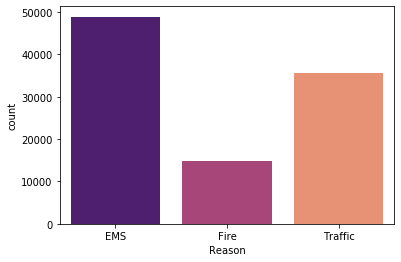

In [43]:
sns.countplot(x='Reason',data=calls,palette='magma')

#### Use pd.to_datetime to convert the column from strings to DateTime objects.

In [25]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [26]:
#view object
type(calls['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Use .apply() to create 3 new columns called Hour, Month, and Day of Week. Create these columns based off of the timeStamp column.

In [27]:
time = calls['timeStamp'].iloc[0]
time.hour

17

In [28]:
time.dayofweek

3

In [29]:
#Create new column "Hour"
calls['Hour'] = calls['timeStamp'].apply(lambda time: time.hour)

In [34]:
#Create new column "Month"
calls['Month'] = calls['timeStamp'].apply(lambda time: time.month)

In [ ]:
#Create new column "Day of Week"
calls['Day of Week'] = calls['timeStamp'].apply(lambda time: time.dayofweek)

In [36]:
#confirm new column creations
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


#### Use .map() to map actual string names to day of the week

In [37]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [38]:
calls['Day of Week'] = calls['Day of Week'].map(dmap)

In [40]:
#Check head of data frame
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


####  Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

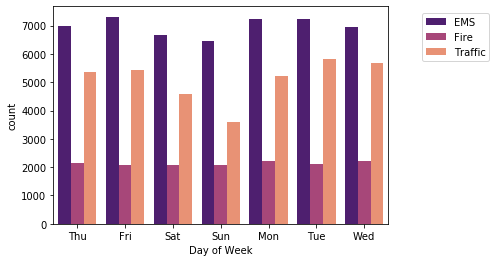

In [54]:
sns.countplot(x='Day of Week',data=calls,hue='Reason',palette='magma')
#move legend location
plt.legend(bbox_to_anchor=(1.1,0.75),loc = 3, borderaxespad=0)

#### Replicate for Month

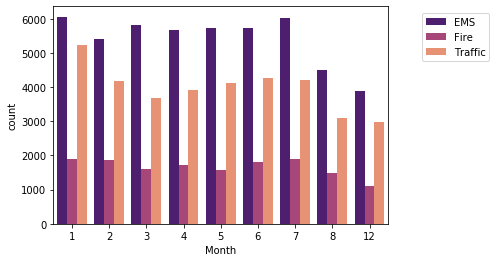

In [55]:
sns.countplot(x='Month',data=calls,hue='Reason',palette='magma')
#move legend location
plt.legend(bbox_to_anchor=(1.1,0.75),loc = 3, borderaxespad=0)

#### Currently some months are missing. Create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

In [56]:
byMonth = calls.groupby('Month').count()

In [58]:
#Check head of by month
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [ ]:
#assume if have latitude data of place, call took place

#### Create a simple plot off of the dataframe indicating the count of calls per month. 

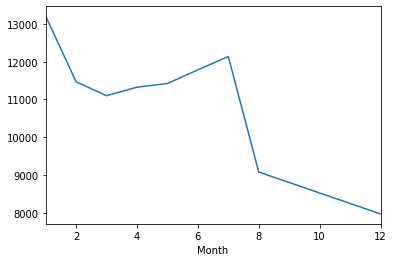

In [60]:
byMonth['lat'].plot()

#### Use seaborn's lmplot() to create a linear fit on the number of calls per month. 

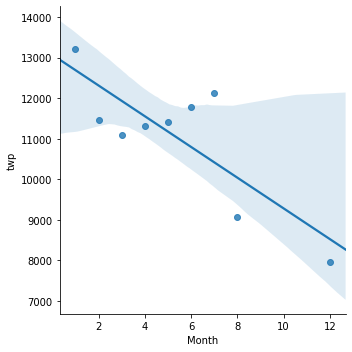

In [63]:
#reset index
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

#### Create a new column called 'Date' that contains the date from the timeStamp column. 

In [66]:
t = calls['timeStamp'].iloc[0]

In [68]:
calls['Date'] = calls['timeStamp'].apply(lambda t:t.date())

In [70]:
#check for new column
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


#### Groupby Date column with the count() aggregate and create a plot of counts of 911 calls.

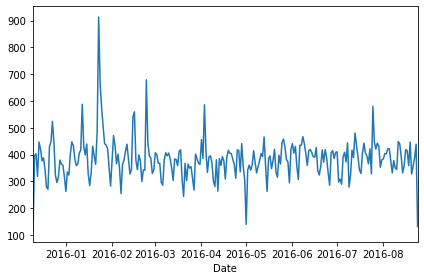

In [72]:
calls.groupby('Date').count()['lat'].plot()
plt.tight_layout()

#### Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.

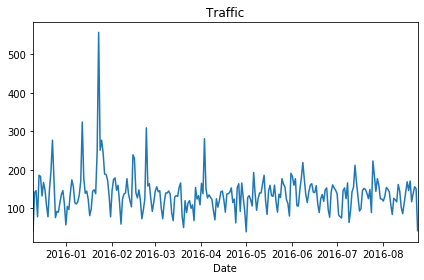

In [74]:
calls[calls['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

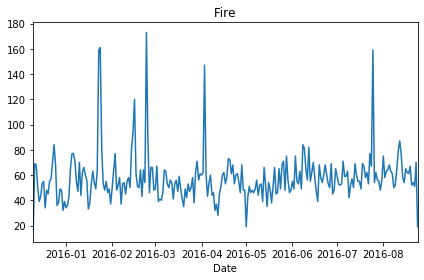

In [75]:
calls[calls['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

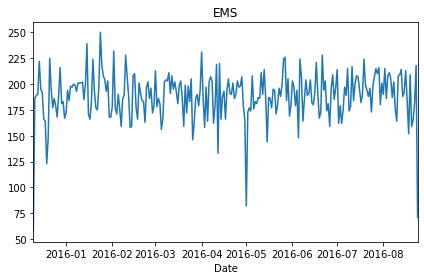

In [76]:
calls[calls['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

#### Move on to creating heatmaps with seaborn and the data. First, will need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 

In [82]:
dayHour = calls.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [83]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


#### Create a HeatMap using this new DataFrame.

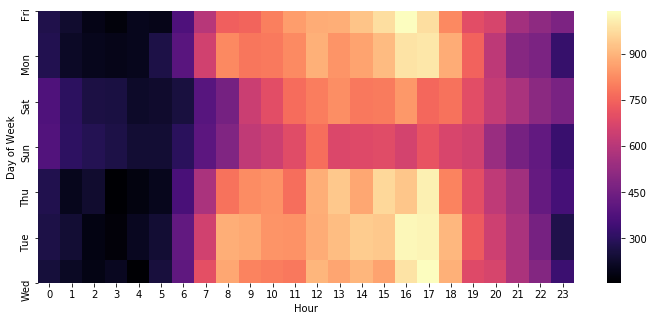

In [86]:
plt.figure(figsize=(12,5))
sns.heatmap(dayHour,cmap='magma')

#### Create a clustermap using this DataFrame. 

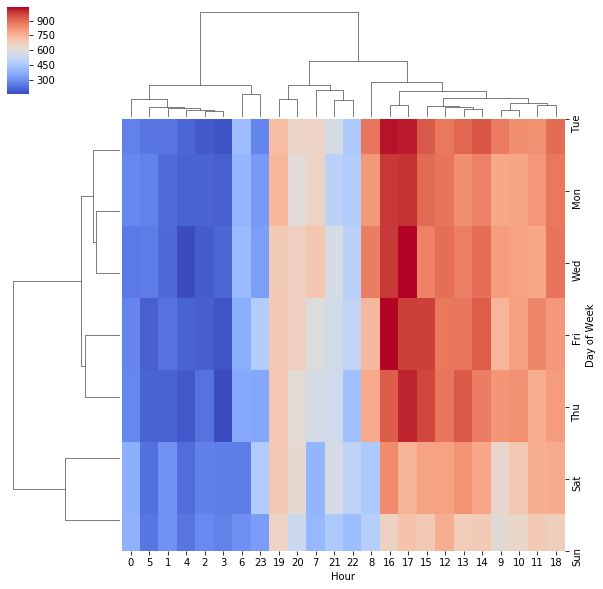

In [88]:
sns.clustermap(dayHour,cmap='coolwarm')